# Project: Estimating whether a car is a good buy or a bad buy based on the posting

## Table of Contents
<ul>
<li><a href="#Introduction">Introduction</a></li>
<li><a href="#DataWrangling">Data Wrangling</a></li>
<li><a href="#ExploratoryDataAnalysis">Exploratory Data Analysis</a></li>
<li><a href="#Conclusions">Conclusions</a></li>
</ul>

<a id='Introduction'></a>
## Introduction
The work contains several stages that the data goes through to facilitate dealing with it and benefit from it in solving problems and answering the most important questions. In this work, data about cars were used in the first stage. The data was read from a CSV file that contains 2000 rows and 16 columns, and each column describes the following:

maker:normalized all lowercase | model:normalized all lowercase | mileage:in KM | manufacture_year
engine_displacement:in ccm | engine_power:in kW | body_type:almost never present, but I scraped only personal cars, no motorcycles or utility vehicles
color_slug:also almost never present | stk_year:the year of the last emission control | transmission:automatic or manual
door_count | seat_count
fuel_type:gasoline, diesel, CNG, LPG, electric | date_created:when the ad was scraped | date_lastseen:when the ad was last seen. Our policy was to remove all ads older than 60 days | price_eur:list price converted to EUR

In the second stage, some columns that contained a large lack of information were deleted and were not helpful in the solution. The rest of the missing values have been replaced by the most frequently occurring values to help represent the data. In order to facilitate the future use of data in machine learning models, the data was converted from categories to numbers, which helps the model in dealing with data. In the third stage, the data was used after processing to answer three main questions and represent them graphically in order to facilitate understanding of the results. 
###### Throughout this work, we are tring to answer this question by exploring the data set and also the connections among variables:
###### and we will answer: 
1- What type of fuel do cars use the most according to Engine Power?

2- What year was the newest car made?

3- What is the average car price?

## Importing the libraries

In [171]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt

<a id='DataWrangling'></a>
## Data Wrangling
### General Properties : Read dataset from CSV file

In [172]:
dataset = pd.read_csv('data1.csv')
dataset.head()

,maker,model,mileage,manufacture_year,engine_displacement,engine_power,body_type,color_slug,stk_year,transmission,door_count,seat_count,fuel_type,date_created,date_last_seen,price_eur
0,ford,galaxy,151000.0,2011.0,2000.0,103.0,NaN,NaN,None,man,5,7,diesel,2015-11-14 18:10:06.838319+00,2016-01-27 20:40:15.46361+00,10584.75
1,skoda,octavia,143476.0,2012.0,2000.0,81.0,NaN,NaN,None,man,5,5,diesel,2015-11-14 18:10:06.853411+00,2016-01-27 20:40:15.46361+00,8882.31
2,bmw,NaN,97676.0,2010.0,1995.0,85.0,NaN,NaN,None,man,5,5,diesel,2015-11-14 18:10:06.861792+00,2016-01-27 20:40:15.46361+00,12065.06
3,skoda,fabia,111970.0,2004.0,1200.0,47.0,NaN,NaN,None,man,5,5,gasoline,2015-11-14 18:10:06.872313+00,2016-01-27 20:40:15.46361+00,2960.77
4,skoda,fabia,128886.0,2004.0,1200.0,47.0,NaN,NaN,None,man,5,5,gasoline,2015-11-14 18:10:06.880335+00,2016-01-27 20:40:15.46361+00,2738.71


In [173]:
## we want to know the count of columns and index
dataset.shape

(1999, 16)

In [174]:
## we want to check if we have a null values or not
pd.isna(dataset).sum()

maker                   479
model                   632
mileage                   1
manufacture_year        253
engine_displacement       4
engine_power              6
body_type              1986
color_slug             1999
stk_year                  0
transmission             62
door_count                0
seat_count                0
fuel_type                 0
date_created              0
date_last_seen            0
price_eur                 0
dtype: int64

In [175]:
## we want to check if the datatypes is well?
## and check if there any mistakes in the names of columns
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1999 entries, 0 to 1998
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   maker                1520 non-null   object 
 1   model                1367 non-null   object 
 2   mileage              1998 non-null   float64
 3   manufacture_year     1746 non-null   float64
 4   engine_displacement  1995 non-null   float64
 5   engine_power         1993 non-null   float64
 6   body_type            13 non-null     object 
 7   color_slug           0 non-null      float64
 8   stk_year             1999 non-null   object 
 9   transmission         1937 non-null   object 
 10  door_count           1999 non-null   object 
 11  seat_count           1999 non-null   object 
 12  fuel_type            1999 non-null   object 
 13  date_created         1999 non-null   object 
 14  date_last_seen       1999 non-null   object 
 15  price_eur            1999 non-null   f

In [176]:
## from the min of 'Age' = -1, We can notice that there is an error, and it will be fixed in the next steps
dataset.describe()

,mileage,manufacture_year,engine_displacement,engine_power,color_slug,price_eur
count,1.998000e+03,1746.000000,1995.000000,1993.00000,0.0,1999.000000
mean,1.297011e+05,2007.332188,1781.716291,89.66583,NaN,9182.711231
std,8.484110e+04,4.974855,559.589448,41.63521,NaN,11968.585785
min,0.000000e+00,1989.000000,599.000000,33.00000,NaN,181.350000
25%,7.125000e+04,2004.000000,1400.000000,66.00000,NaN,2953.370000
50%,1.322590e+05,2007.000000,1600.000000,80.00000,NaN,5736.490000
75%,1.807832e+05,2011.000000,1992.000000,103.00000,NaN,10214.660000
max,1.774593e+06,2015.000000,6208.000000,412.00000,NaN,142487.050000


### Data Cleaning (Here we will fix the mistakes we saw it from pervious steps)

## Drop some not necessary columns and filling NaN values with most frequent values

In [177]:
dataset=dataset.drop('body_type', axis='columns')
dataset=dataset.drop('color_slug', axis='columns')
dataset=dataset.drop('stk_year', axis='columns')
dataset = dataset.apply(lambda x: x.fillna(x.value_counts().index[0]))
dataset2 = dataset

## One Hot Encoding
#### With one-hot, we convert each categorical value into a new categorical column and assign a binary value of 1 or 0 to those columns

In [178]:
ohe = OneHotEncoder()
oheR = ohe.fit_transform(dataset[["maker"]])
new_data = pd.DataFrame(oheR.toarray(), columns=ohe.categories_)
dataset = pd.merge(new_data, dataset, right_index=True, left_index=True)

In [179]:
ohe2 = OneHotEncoder()
oheR2 = ohe2.fit_transform(dataset[["maker"]])
new_data2 = pd.DataFrame(oheR2.toarray(), columns=ohe2.categories_)
dataset = pd.merge(new_data2, dataset, right_index=True, left_index=True)

## Convert column values to numbers instead of categories to facilitate data handling

In [180]:
dataset['transmission'] = dataset['transmission'].replace({
    'man':0,
    'auto':1
})

dataset['fuel_type'] = dataset['fuel_type'].replace({
    'diesel':0,
    'gasoline':1
})


In [181]:
dataset.head(1000)

,"(audi_x,)","(bmw_x,)","(chevrolet_x,)","(chrysler_x,)","(citroen_x,)","(dodge_x,)","(fiat_x,)","(ford_x,)","(honda_x,)","(hummer_x,)",...,manufacture_year,engine_displacement,engine_power,transmission,door_count,seat_count,fuel_type,date_created,date_last_seen,price_eur
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,2011.0,2000.0,103.0,0,5,7,0,2015-11-14 18:10:06.838319+00,2016-01-27 20:40:15.46361+00,10584.75
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2012.0,2000.0,81.0,0,5,5,0,2015-11-14 18:10:06.853411+00,2016-01-27 20:40:15.46361+00,8882.31
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2010.0,1995.0,85.0,0,5,5,0,2015-11-14 18:10:06.861792+00,2016-01-27 20:40:15.46361+00,12065.06
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2004.0,1200.0,47.0,0,5,5,1,2015-11-14 18:10:06.872313+00,2016-01-27 20:40:15.46361+00,2960.77
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2004.0,1200.0,47.0,0,5,5,1,2015-11-14 18:10:06.880335+00,2016-01-27 20:40:15.46361+00,2738.71
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2004.0,1896.0,66.0,0,5,5,0,2015-11-14 18:55:52.047633+00,2016-01-27 20:40:15.46361+00,3663.95
996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2006.0,1390.0,55.0,0,5,5,1,2015-11-14 18:55:52.065277+00,2016-01-27 20:40:15.46361+00,3515.91
997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1997.0,1840.0,66.0,0,4,5,1,2015-11-14 18:55:52.104466+00,2016-01-27 20:40:15.46361+00,666.17
998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2004.0,1086.0,43.0,0,5,5,1,2015-11-14 18:55:52.117998+00,2016-01-27 20:40:15.46361+00,2035.53


<a id='ExploratoryDataAnalysis'></a>
## Exploratory Data Analysis

## Questions :
### Research Q. 1) What type of fuel do cars use the most according to Engine Power? 
#### ( Here will we see the type of fuel do cars use most )

#### Here we will create two data set, one for cars that use diesel, and one for cars that use gasoline:

In [182]:
diesel = dataset2.query('fuel_type  == "diesel"')

In [183]:
gasoline = dataset2.query('fuel_type  == "gasoline"')

#### Here we will see the number of cars that use diesel, and that use gasoline:

In [184]:
len(diesel)

1062

In [185]:
len(gasoline)

937

#### Now we will use bar chart to see the number of cars that uses diesel and gasoline:

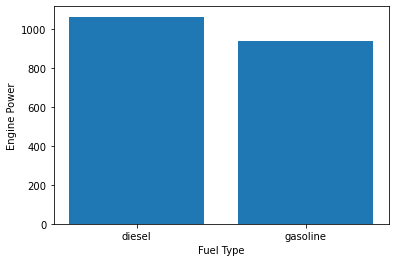

In [186]:
plt.bar(dataset2['fuel_type'].unique(), dataset2.groupby(['fuel_type']).count().engine_power);
plt.ylabel("Engine Power")
plt.xlabel("Fuel Type");

#### Now we will use pie chart to see the percentage of cars that use diesel and cars that use gasoline:

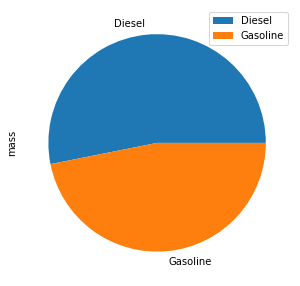

In [187]:
pie = pd.DataFrame({'mass': [len(diesel),  len(gasoline)],
                   'radius': [len(diesel), len(gasoline)]},
                  index=['Diesel', 'Gasoline'])
plot = pie.plot.pie(y='mass', figsize=(5, 5))

#### We know now the percentage of cars that use diesel is 53.1% and cars that use gasoline is 46.9%:

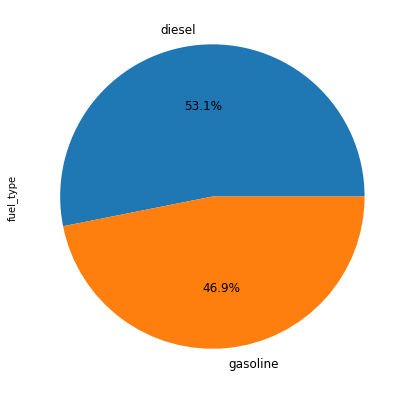

In [188]:
dataset2['fuel_type'].value_counts().plot.pie(figsize=(7,7), autopct='%1.1f%%', fontsize = 12)
plt.show()

### So, we can notice the percentage of cars that use diesel is more than cars that use gasoline but we can see they are close to each other

#### The answer:

In [189]:
x = dataset2['fuel_type'].value_counts().idxmax()
print("Answer:",x)

Answer: diesel


### 2) What year was the newest car made? 
#### ( Here will we see the year of newest car was made )

#### Now we will use bar chart to see how many cars were made in all the years:

In [190]:
made = dataset2.query('manufacture_year  == 2010')

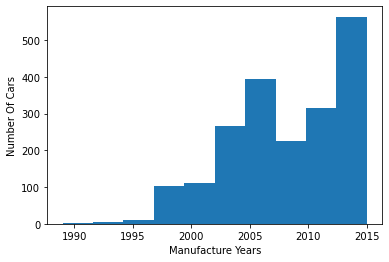

In [191]:
plt.hist(dataset2.manufacture_year);
plt.ylabel("Number Of Cars")
plt.xlabel("Manufacture Years");

### We can see that the most recent year in which a car was made is 2015, which is the year in which most cars were made

#### The answer:

In [193]:
y = dataset2['manufacture_year'].max()
print("Answer:",y)

Answer: 2015.0


### Research Q. 3) What is the average car price?
#### ( Here will we see the the average car price )

#### Now we will use scatter to see the price for each car:

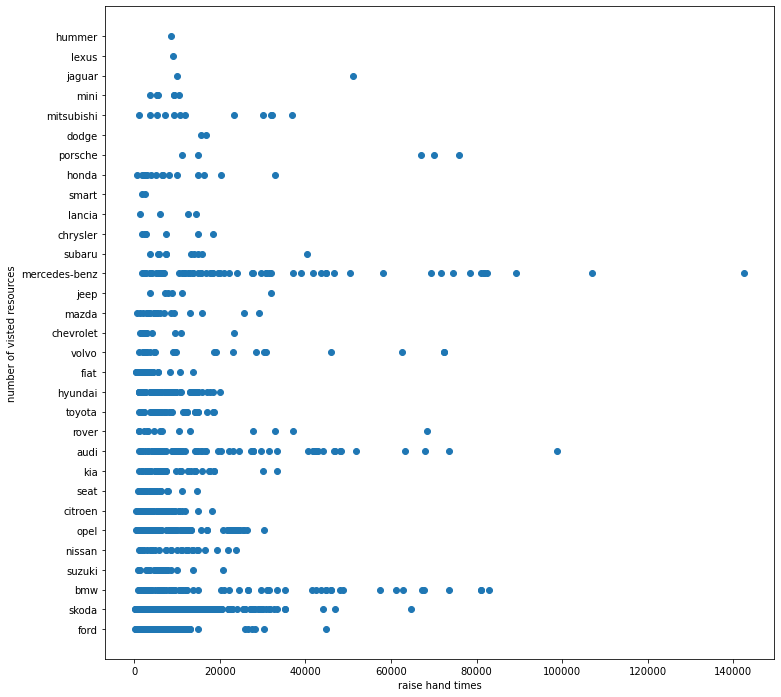

In [195]:
index = dataset2.price_eur
plt.figure(figsize=(12,12));
plt.scatter(dataset2.price_eur, dataset2.maker);
plt.xlabel("raise hand times")
plt.ylabel("number of visted resources");

### We can see that the prices of cars often range between 0 - 40000

#### The answer:

In [194]:
z = dataset2['price_eur'].mean()
print("Answer:",z)

Answer: 9182.711230615316


<a id='Conclusions'></a>
## Conclusions:
#### 1-The data was able to answer all the questions accurately, which helps to get out of this data with results that help in understanding the characteristics of cars and the correlation of that with their prices.
#### 2-The percentage of cars that use diesel is more than cars that use gasoline but we can see they are close to each other.
#### 3-The most recent year in which a car was made is 2015, which is the year in which most cars were made.
#### 3-That the prices of cars often range between 0 - 40000 and average car price is  9182.